# COMP30920 Software & Data Project

Cian Ferriter

<font color = blue> Covid-19 Data Analysis


In [1]:
#Relevant Module imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import numpy as np

##### <font color=red> Importing the Datasets into dataframes

In [2]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df  = pd.read_csv(confirmed_url)
recovered_df = pd.read_csv(recovered_url)
deaths_df = pd.read_csv(deaths_url)

##### Quick check to make sure data imported correctly

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,267,276,284,291,315,328,346,346,346,386


In [4]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,799,799,799,799,800,800,800,800,800,800
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,93,93,97,97,107,108,108,108,117


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,721,733,746,774,807,819,826,864,898,920
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,58,62,65,69,72,74,76,79,81
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,897,905,912,920,928,937,946,952,959,968
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,13,15,17,18,19,19,19,21


All looks to be ok so can get started on the Data Cleansing side of things.

## <font color = red> Data Cleansing

Immediately from the above we can see issues with the data in the 'Province/State' column. this will require further investigation to see if it needs to be dropped or can be adequately populated. <br>
I will perform some standard data checks on the columns to see if the data requires some alterations.

In [6]:
confirmed_df.shape

(266, 172)

In [7]:
recovered_df.shape

(253, 172)

In [8]:
deaths_df.shape

(266, 172)

It appears that not all of the datasets are the same size. The recovered set seems to have 13 less rows than the other 2 datasets. This will require some investigation

In [9]:
recovered_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,219,235,236,252,260,267,267,268,269,279
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,430,432,488,504,513,536,537,552,575,591
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,161,161,200,200,200,241,241,266,266,266
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4448,4506,4506,4627,4690,4690,4809,4858,4914,4965
252,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,4,4,4,11,11,11,11,11,11,11


In [10]:
confirmed_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,713,713,714,715,717,719,719,720,721,724
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,272,272,303,303,303,309,309,311,311,311
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,27,27,27,35,35,35,35,79,91,91


In [11]:
counts=[]
counts=confirmed_df.isnull().sum()
print(counts)

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/3/20              0
7/4/20              0
7/5/20              0
7/6/20              0
7/7/20              0
Length: 172, dtype: int64


From this it appears that the the only compromised column is the Province/State column. I will investigate this column further below

In [12]:
df = pd.DataFrame(confirmed_df["Province/State"].dropna())
df

,Province/State
8,Australian Capital Territory
9,New South Wales
10,Northern Territory
11,Queensland
12,South Australia
...,...
249,British Virgin Islands
250,Turks and Caicos Islands
255,"Bonaire, Sint Eustatius and Saba"
257,Falkland Islands (Malvinas)


Out of 266 rows, only 81 are populated in the Province/State column. There is simply not enough data contained here to justify keeping this column. I will drop this column but may revisit this later if I need to do some region specific analysis

In [13]:
confirmed_df.drop(['Province/State'],axis=1, inplace=True)

In [14]:
confirmed_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,267,276,284,291,315,328,346,346,346,386


In [15]:
recovered_df.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/3/20              0
7/4/20              0
7/5/20              0
7/6/20              0
7/7/20              0
Length: 172, dtype: int64

In [16]:
recovered_df.drop(['Province/State'],axis=1, inplace=True)

In [17]:
recovered_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,799,799,799,799,800,800,800,800,800,800
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,81,93,93,97,97,107,108,108,108,117


In [18]:
deaths_df.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/3/20              0
7/4/20              0
7/5/20              0
7/6/20              0
7/7/20              0
Length: 172, dtype: int64

In [19]:
deaths_df.drop(['Province/State'],axis=1, inplace=True)

In [20]:
deaths_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,721,733,746,774,807,819,826,864,898,920
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,55,58,62,65,69,72,74,76,79,81
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,897,905,912,920,928,937,946,952,959,968
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,11,11,13,15,17,18,19,19,19,21


I have dropped the useless column but I still think the dataframe could use some alterations. <br> Right now the dataframe is very wide, ~150 columns wide. This is not very practical. I will try do some work on this to improve its usability.

In [21]:
def meltData(df,name):
    #I dont want the Lat and Long data in this frame so I will drop this also
    df_melt=df.drop(['Lat', 'Long'],axis=1)
    #melt the dateframe to go from wide to short
    df_melt=df_melt.melt(id_vars=['Country/Region'],value_name=name,var_name='Date')
    #convert the date column into a datetime object
    df_melt['Date']= pd.to_datetime(df_melt['Date'])
    df_melt['date'] = df_melt['Date'].dt.date
    df_melt.drop('Date', axis=1,inplace=True)
    df_melt=df_melt.rename(columns={'date':'Date'})
    #set the index of the frame
    df_melt=df_melt.set_index(['Country/Region', 'Date'])
    return df_melt 

Get all 3 dataframes into the melted format

In [22]:
confirmed_df_melt=meltData(confirmed_df, "Cases")
recovered_df_melt=meltData(recovered_df, "Recoveries")
deaths_df_melt=meltData(deaths_df, "Deaths")

In [23]:
confirmed_df_melt

,,Cases
Country/Region,Date,
Afghanistan,2020-01-22,0
Albania,2020-01-22,0
Algeria,2020-01-22,0
Andorra,2020-01-22,0
Angola,2020-01-22,0
...,...,...
Sao Tome and Principe,2020-07-07,724
Yemen,2020-07-07,1297
Comoros,2020-07-07,311


In [24]:
recovered_df_melt

,,Recoveries
Country/Region,Date,
Afghanistan,2020-01-22,0
Albania,2020-01-22,0
Algeria,2020-01-22,0
Andorra,2020-01-22,0
Angola,2020-01-22,0
...,...,...
Sao Tome and Principe,2020-07-07,279
Yemen,2020-07-07,591
Comoros,2020-07-07,266


In [25]:
deaths_df_melt.tail()

,,Deaths
Country/Region,Date,
Sao Tome and Principe,2020-07-07,13
Yemen,2020-07-07,348
Comoros,2020-07-07,7
Tajikistan,2020-07-07,53
Lesotho,2020-07-07,0


This is much better but in its current format it will be next to impossible to gather information about individual countries in this format. I will therefore group the countries together with the entire date range so they can be analysed easier.

In [26]:
def countryClean(df, name):
    #get the countries arranged by country, date and then sum up the cases for that country on that date
    df_countries = df.groupby(['Country/Region','Date'])[name].sum()
    #the above returns a series so need to convert back into a df
    df_countries=pd.DataFrame(df_countries)
    #reset index
    df_countries=df_countries.reset_index()
    #set the index to be country and date
    df_countries=df_countries.set_index(['Country/Region', 'Date'])
    #set levels to alow for multilevel indexing later on
    df_countries.index=df_countries.index.set_levels([df_countries.index.levels[0], pd.to_datetime(df_countries.index.levels[1])])
    df_countries=df_countries.sort_values(['Country/Region','Date'],ascending=True)
    
    return df_countries

In [27]:
confirmed_df_countries = countryClean(confirmed_df_melt, "Cases")
recovered_df_countries = countryClean(recovered_df_melt, "Recoveries")
deaths_df_countries = countryClean(deaths_df_melt, "Deaths")

In [28]:
confirmed_df_countries

Cases
Country/Region Date             
Afghanistan    2020-01-22      0
               2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
...                          ...
Zimbabwe       2020-07-03    625
               2020-07-04    698
               2020-07-05    716
               2020-07-06    734
               2020-07-07    787

[31584 rows x 1 columns]

In [29]:
recovered_df_countries

Recoveries
Country/Region Date                  
Afghanistan    2020-01-22           0
               2020-01-23           0
               2020-01-24           0
               2020-01-25           0
               2020-01-26           0
...                               ...
Zimbabwe       2020-07-03         176
               2020-07-04         181
               2020-07-05         181
               2020-07-06         197
               2020-07-07         201

[31584 rows x 1 columns]

In [30]:
deaths_df_countries

Deaths
Country/Region Date              
Afghanistan    2020-01-22       0
               2020-01-23       0
               2020-01-24       0
               2020-01-25       0
               2020-01-26       0
...                           ...
Zimbabwe       2020-07-03       7
               2020-07-04       8
               2020-07-05       8
               2020-07-06       9
               2020-07-07       9

[31584 rows x 1 columns]

In [31]:
confirmed_df_countries.loc["China", : ]

,Cases
Date,
2020-01-22,548
2020-01-23,643
2020-01-24,920
2020-01-25,1406
2020-01-26,2075
...,...
2020-07-03,84838
2020-07-04,84857
2020-07-05,84871


### Data Validation

I want to make sure the data I have formatted is still intact from its original state

In [32]:
verified_df=confirmed_df_countries.groupby(['Date']).sum()
verified_df.max()

Cases    11829602
dtype: int64

In [33]:
verified_df=deaths_df_countries.groupby(['Date']).sum()
verified_df.max()

Deaths    544163
dtype: int64

In [34]:
verified_df=recovered_df_countries.groupby(['Date']).sum()
verified_df.max()

Recoveries    6447656
dtype: int64

Comparing the max value to the worldometers (https://www.worldometers.info/coronavirus/ ) sum totals for Cases, Deaths, Recoveries I am confident the data is uncorrrupted (within a reasonable margin of error - there are different collection methods which leads to differing figures on a worldwide scale - particulary with the 'Recovered' cases)

#### With the data now cleaned and verified I can begin digging in to some of the data to produce visulisations

## <font color=red> Visualisation 1

The first set of visualisations we need to produce is a sum of all the cases, deaths and recoveries worldwide placed on a log scale.

In [35]:
def logPlot(df, name):
    p=df.groupby(['Date']).sum().plot(title="Total " + name + "\nLog Scale",figsize=(10,6), logy=True)
    p.set_xlabel("Date")
    p.set_ylabel("Total " + name + " (Log)")

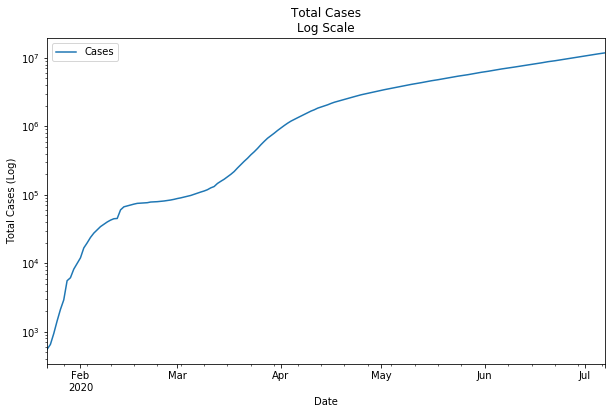

In [36]:
logPlot(confirmed_df_countries, "Cases")

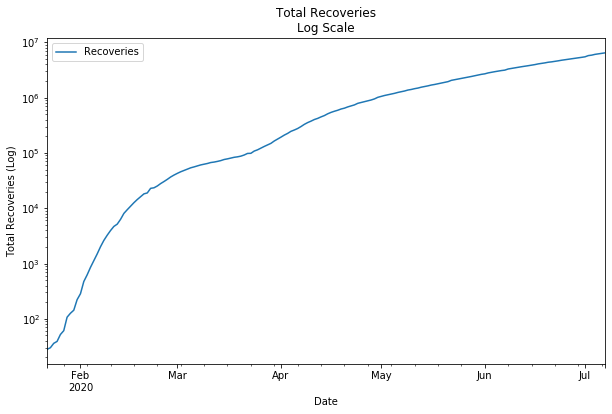

In [37]:
logPlot(recovered_df_countries, "Recoveries")

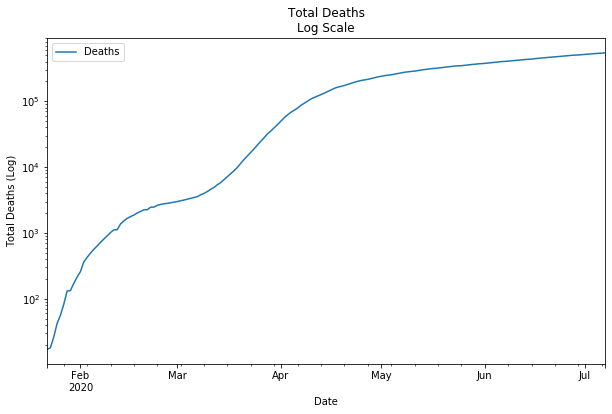

In [38]:
logPlot(deaths_df_countries, "Deaths")

# <font color = red> Visualisation 1 (b)

The next set of visualisations we need to produce is a bar chart of daily cases worldwide on a linear scale with a 3 day rolling average placed over.

Here I will use the summed dataframe and use the .diff() function to get the daily cases

In [39]:
def getDailyData(df, name):
    
    daily = df.groupby('Date')[name].sum()
    daily = pd.DataFrame(daily)
    daily[name] = daily[name].diff().fillna(0)
    daily["Rolling"] = daily.rolling(window=3).mean()

    return daily

In [40]:
temp = getDailyData(confirmed_df_melt, "Cases")
temp

,Cases,Rolling
Date,,
2020-01-22,0.0,NaN
2020-01-23,99.0,NaN
2020-01-24,287.0,128.666667
2020-01-25,493.0,293.000000
2020-01-26,684.0,488.000000
...,...,...
2020-07-03,204160.0,209402.333333
2020-07-04,193028.0,201648.666667
2020-07-05,183082.0,193423.333333


In [41]:
def dailyPlot(daily, name): 
    dates=daily.index
#     print(dates)
    daily=daily.reset_index()
    #create axes and figure
    fig, ax = plt.subplots()

    ax = daily[name].plot(kind="bar", figsize=(12,6))
    ax.plot(daily["Rolling"], color='r')
    ax.set_title('Daily Worldwide ' + name + '\n 3 day MA')
    
    
    #set x-axis
    x_range = np.arange( 0, len(dates) , 3)
    plt.xticks( x_range, rotation = 60 )
    ax.set_xticklabels(dates)
    plt.xlabel("Date")
    
    plt.ylabel("Total " + name + " Worldwide")


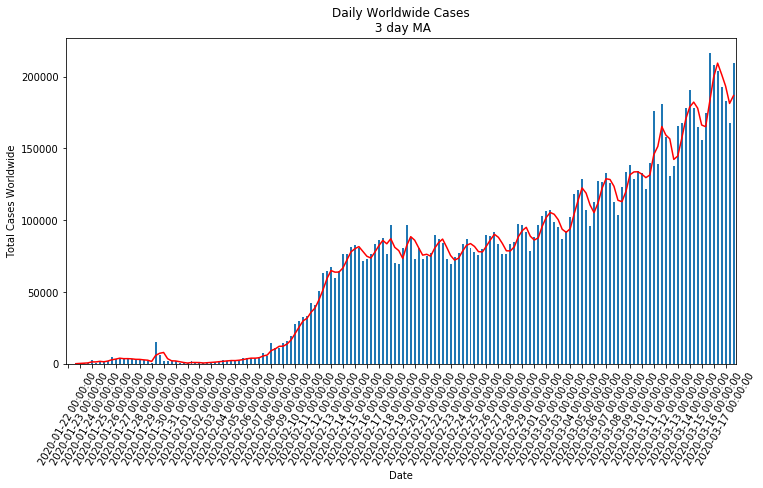

In [42]:
dailyPlot(getDailyData(confirmed_df_melt, "Cases"), 'Cases')

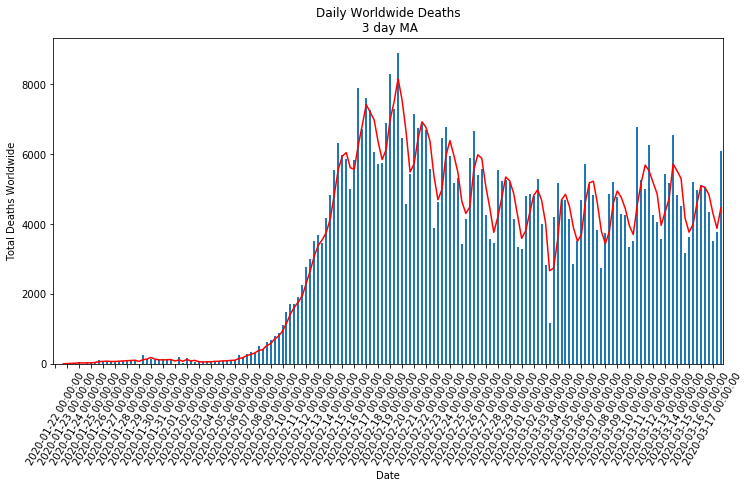

In [43]:
dailyPlot(getDailyData(deaths_df_melt, "Deaths"), 'Deaths')

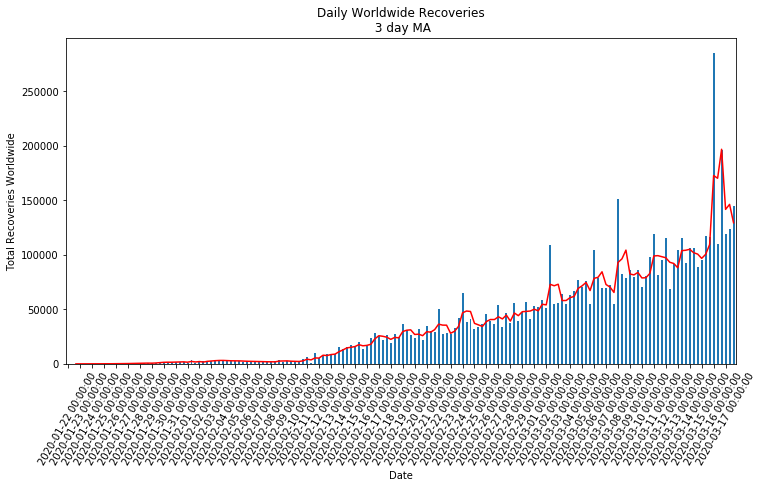

In [44]:
dailyPlot(getDailyData(recovered_df_melt, 'Recoveries'), 'Recoveries')

# <font color= red> Visualisation 2

This visualisation presents the countries with days since the 100th confirmed case against total cases and likewise for Deaths and Recoveries after 10th.

In [45]:
def getXDay(df, i, var):
    
    #use the apply function to create a new column which states the point at which a country had >= 100 cases and use a boolean to determine this
    df["True/False"] = df[var].apply(lambda x: x >=i)
    #remove false values so only rpws with values of cases >= 100 remain
    df = df.loc[df['True/False'], :]
    df=df.drop('True/False', axis=1)
   
    
    return df

In [46]:
#remove days previous to 100th/10th 
confirmed_100_df=getXDay(confirmed_df_countries, 100, 'Cases')
deaths_10_df=getXDay(deaths_df_countries, 10, 'Deaths')
recovered_10_df=getXDay(recovered_df_countries, 10, 'Recoveries')

In [47]:
confirmed_100_df

Cases
Country/Region Date             
Afghanistan    2020-03-27    110
               2020-03-28    110
               2020-03-29    120
               2020-03-30    170
               2020-03-31    174
...                          ...
Zimbabwe       2020-07-03    625
               2020-07-04    698
               2020-07-05    716
               2020-07-06    734
               2020-07-07    787

[16303 rows x 1 columns]

In [48]:
#create a list of all the countries we want to color and focus on in the plots
special_countries = ['Ireland','US', 'Italy', 'Spain', 'Germany', 'France', 'United Kingdom', 'Canada', 'Korea, South', 'Japan', 'Singapore', 'China']

In [49]:
def makeSpecialDf(df, country_list):
    
    special_df=pd.DataFrame()
    #loop through df and append countries in list
    for country in special_countries:
        special_df=special_df.append(df.loc(axis=0)[country, :,], ignore_index=False)
    return special_df

In [50]:
#create dataframes of the special countries
special_confirmed_df = makeSpecialDf(confirmed_100_df, special_countries)
special_deaths_df = makeSpecialDf(deaths_10_df, special_countries)
special_recovered_df = makeSpecialDf(recovered_10_df, special_countries)

In [51]:
special_deaths_df

Deaths
Country/Region Date              
Ireland        2020-03-26      19
               2020-03-27      22
               2020-03-28      36
               2020-03-29      46
               2020-03-30      54
...                           ...
China          2020-07-03    4641
               2020-07-04    4641
               2020-07-05    4641
               2020-07-06    4641
               2020-07-07    4641

[1460 rows x 1 columns]

In [52]:
def addDaysCol(df):
    
    #create a new column called 'Days' which will contain the days since 100th case data - filling with nan values for now
    df['Days'] = np.nan
    #loop through the level 0 country column add create a numpy list of integers - represent days since 100/10th case/death/recovery
    
    for row in df.iterrows():
        df.loc[row[0][0], 'Days'] = np.arange(0, len(df.loc[row[0][0], 'Days']), 1)
        
    return df

In [53]:
#create a dataframe of the 'special' countries with the days column
special_confirmed_df=addDaysCol(special_confirmed_df)
special_deaths_df=addDaysCol(special_deaths_df)
special_recovered_df=addDaysCol(special_recovered_df)

In [54]:
#quick look at a random country from the list to eyeball the data
special_confirmed_df.loc(axis=0)['US', :,]

Cases   Days
Country/Region Date                      
US             2020-03-04      104    0.0
               2020-03-05      174    1.0
               2020-03-06      222    2.0
               2020-03-07      337    3.0
               2020-03-08      451    4.0
...                            ...    ...
               2020-07-03  2795361  121.0
               2020-07-04  2841241  122.0
               2020-07-05  2891124  123.0
               2020-07-06  2936077  124.0
               2020-07-07  2996098  125.0

[126 rows x 2 columns]

In [55]:
#add in the days column for all dataframes
confirmed_100_df = addDaysCol(confirmed_100_df)
deaths_10_df = addDaysCol(deaths_10_df)
recovered_10_df =addDaysCol(recovered_10_df)

In [56]:
#get data for one country to eyeball data
deaths_10_df.loc(axis=0)['Chile', :,]

Deaths  Days
Country/Region Date                    
Chile          2020-03-31      12   0.0
               2020-04-01      16   1.0
               2020-04-02      18   2.0
               2020-04-03      22   3.0
               2020-04-04      27   4.0
...                           ...   ...
               2020-07-03    6051  94.0
               2020-07-04    6192  95.0
               2020-07-05    6308  96.0
               2020-07-06    6384  97.0
               2020-07-07    6434  98.0

[99 rows x 2 columns]

Testing out plotting just Ireland to begin with - will use this as a base for plotting all other countries then

115.0 25538


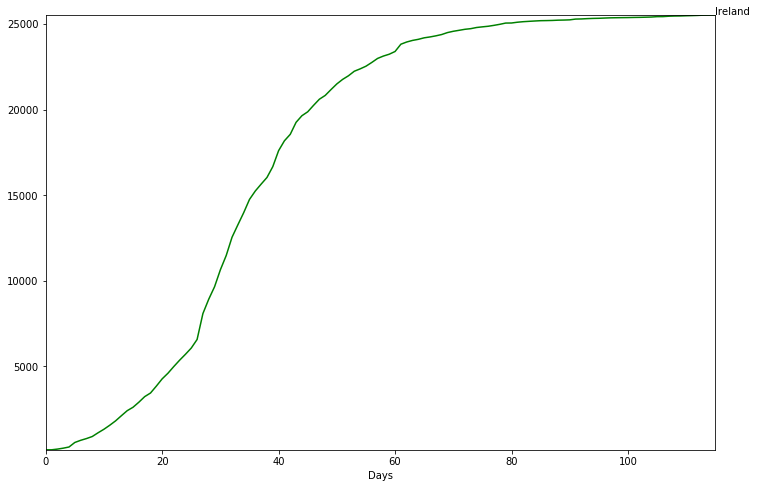

In [57]:
fig, ax = plt.subplots()
special_confirmed_df.loc["Ireland", : ].plot(x = 'Days', y = 'Cases', ax = ax, figsize=(12,8), color='g') 
# remove the legend from the plot
ax.legend_.remove()
#get the co-ordinates of the plot
# coord_list=[]
# ax = plt.gca()
# line = ax.lines[0]
# coord_list = line.get_xydata()

x=special_confirmed_df.loc["Ireland", : ]['Days'][-1]
y=special_confirmed_df.loc["Ireland", : ]['Cases'].values[-1]
# add country annotation based on last coordinate pair in list
ax.annotate('Ireland', (x,y))
print(x,y)
plt.margins(0)






The above is a good starting point I can use this code as a basis for the main plot

In [58]:
#I need to make a list of all the countries in the dataset, this function does that
def countryList(df):
    countries=set()
    #loop through the df and add the countries to a set
    for row in df.iterrows():
        countries.add(row[0][0])

    return countries

In [59]:
#remove duplicates using set
con_countries = set(countryList(confirmed_100_df))
deaths_countries = set(countryList(deaths_10_df))
rec_countries = set(countryList(recovered_10_df))

In [60]:
len(deaths_countries)

150

In [61]:
def consolidatedList(lists):
    #create a list of the countries but exclude the 'special countries'
    item_list = [e for e in lists if e not in special_countries]
    
    return item_list

In [62]:
#create the lists for each type using the above function
con_countries_cons = consolidatedList(con_countries)
deaths_countries_cons = consolidatedList(deaths_countries)
rec_countries_cons = consolidatedList(rec_countries)

In [63]:
len(deaths_countries_cons)

138

###### test run of doubling lines

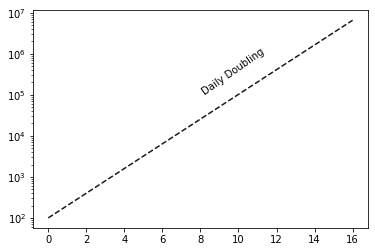

In [64]:
fig, ax = plt.subplots()
x = list(range(confirmed_100_df['Days'].astype(int).max()))
#Double every day
double = [(2**(val))*100 for val in x] 
plt.plot(x[:17], double[:17], 'k--', alpha=.9) 
plt.annotate('Daily Doubling' , xy=(x[8], double[10]), color='Black', rotation= 35)

ax.set_yscale('log')


The above works well and gives me a good line on the log scale. I will use this as a basis for all the other lines

In [65]:
def specialPlot(df_s, df, var, special_countries, item_list):
    
    #create axes and figure
    fig, ax = plt.subplots()


    for country in item_list:
        if(country=="Ireland"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='tab:blue',marker="o",ls='dashed')
            x=df_s.loc["Ireland", : ]['Days'][-1]
            y=df_s.loc["Ireland", : ][var].values[-1]
            # add country annotation based on last coordinate pair in list
            ax.annotate('Ireland', (x,y))

        if(country=="US"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='r',marker="o",ls='dashed')
            x=df_s.loc["US", : ]['Days'][-1]
            y=df_s.loc["US", : ][var].values[-1]
            # add country annotation based on last coordinate pair in list
            ax.annotate('US',  (x,y))

        if(country=="Italy"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='tab:orange',marker="o",ls='dashed')

            x=df_s.loc["Italy", : ]['Days'][-1]
            y=df_s.loc["Italy", : ][var].values[-1]
            # add country annotation based on last coordinate pair in list
            ax.annotate('Italy',  (x,y))

        if(country=="Spain"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='tab:green',marker="o",ls='dashed')
            x=df_s.loc["Spain", : ]['Days'][-1]
            y=df_s.loc["Spain", : ][var].values[-1]
            # add country annotation based on last coordinate pair in list
            ax.annotate('Spain',  (x,y))



        if(country=="United Kingdom"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='#337192',marker="o",ls='dashed')
            x=df_s.loc["United Kingdom", : ]['Days'][-1]
            y=df_s.loc["United Kingdom", : ][var].values[-1]
            # add country annotation based on last coordinate pair in list
            ax.annotate('United Kingdom',  (x,y))

        if(country=="Canada"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='tab:purple',marker="o",ls='dashed')
            x=df_s.loc["Canada", : ]['Days'][-1]
            y=df_s.loc["Canada", : ][var].values[-1]
            # add country annotation based on last coordinate pair in list
            ax.annotate('Canada',  (x,y))



        if(country=="Germany"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='#dfff82',marker="o",ls='dashed')
            x=df_s.loc["Germany", : ]['Days'][-1]
            y=df_s.loc["Germany", : ][var].values[-1] 
            # add country annotation based on last coordinate pair in list
            ax.annotate('Germany',  (x,y))

        if(country=="China"):
            df_s.loc[country, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='tab:brown',marker="o",ls='dashed')
            x=df_s.loc["China", : ]['Days'][-1]
            y=df_s.loc["China", : ][var].values[-1] 
            # add country annotation based on last coordinate pair in list
            ax.annotate('China',  (x,y))


        
    #add the rest of the countries in unlabeld and grey
    for countries in item_list:
            df.loc[countries, : ].plot(x = 'Days', y = var, ax = ax, figsize=(15,10), color='#D8D8D8', alpha=0.2)
            


    ax.set_yscale('log')
    ax.legend_.remove()
    if(var == 'Cases'):
        plt.title("Cases By Time")
        plt.xlabel('Days Since 100th Case')
        plt.ylabel('Total Cases')
        doubler = 100
        ylimit = 10000000
    else:
        plt.title(var+" By Time")
        plt.xlabel('Days Since 10th ' +var)
        plt.ylabel('Total '+var)
        doubler = 10
        ylimit = 1000000

    x = list(range(df['Days'].astype(int).max()))


    #Double every day
    #uses formula y = y0*(2**x) to build y coordinates list
    ydailydouble = [(2**(val))*doubler for val in x] 
    plt.plot(x[:20], ydailydouble[:20], 'k--', alpha=.7) 
    plt.annotate('Doubles Daily' , xy=(x[8], ydailydouble[10]), color='Black', rotation= 80)

    #Double every 2 days
    y2double = [(2**(val/2)) * doubler for val in x] 
    plt.plot(x[:40], y2double[:40], 'k--', alpha=.7) 
    plt.annotate('Doubles Every 2 Days', xy =(x[19], y2double[21]), color='Black', rotation=70)

    # double every 5 days
    y5double = [(2**(val/5))*doubler for val in x] 
    plt.plot(x[:89], y5double[:89],'k--' , alpha=.7) 
    plt.annotate('Doubles Every 5 Days', xy=(x[68], y5double[70]), color='Black', rotation= 52) 

    #7day double 
    y7double = [(2**(val/7))*doubler for val in x]
    plt.plot(x[:125], y7double[:125], 'k--', alpha=.7) 
    plt.annotate("Doubles Every Week", xy=(x[100], y7double[102]), color ='Black', rotation=40)

    # fortnightly double
    y14double = [(2**(val/14))*doubler for val in x]
    plt.plot(x, y14double, 'k--', alpha=.7) 
    plt.annotate("Doubles Fortnightly", xy=(x[140], y14double[142]), color='Black', rotation=24) 
    #set the y limit so that doubling lines extend the full length of graph
    plt.ylim(doubler, ylimit)
    plt.margins(0)
    plt.grid(True)
    plt.show()

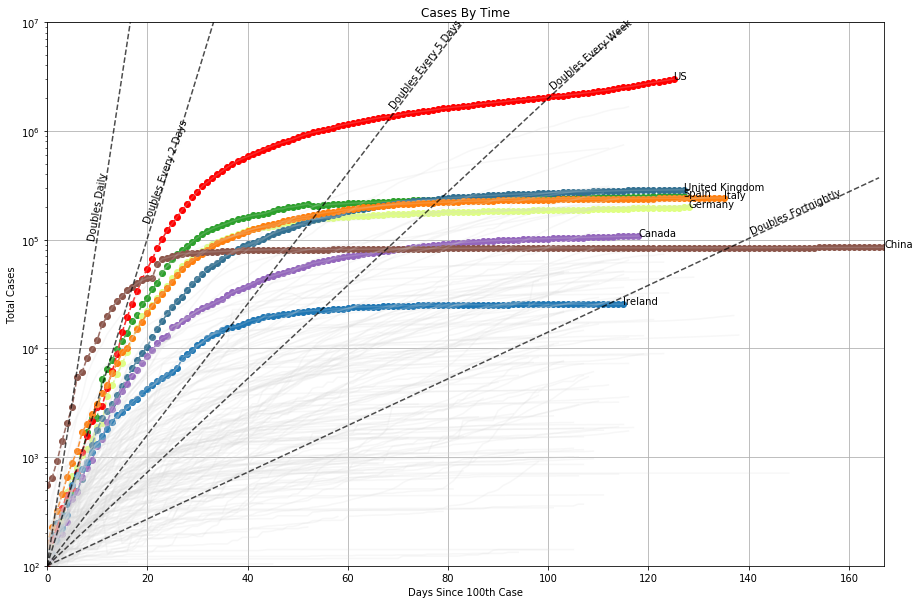

In [66]:
specialPlot(special_confirmed_df, confirmed_100_df, 'Cases', special_countries, con_countries)

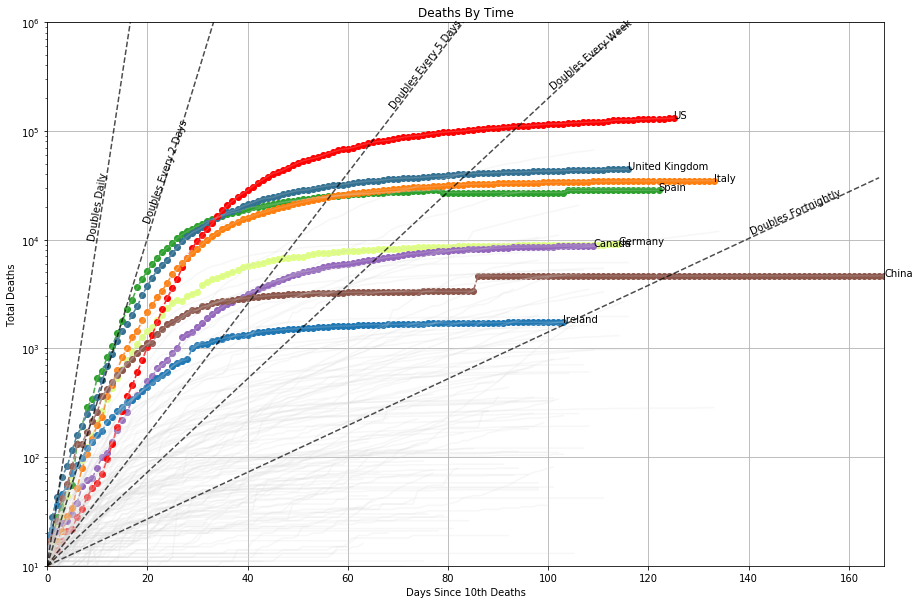

In [67]:
specialPlot(special_deaths_df, deaths_10_df, 'Deaths', special_countries, deaths_countries )

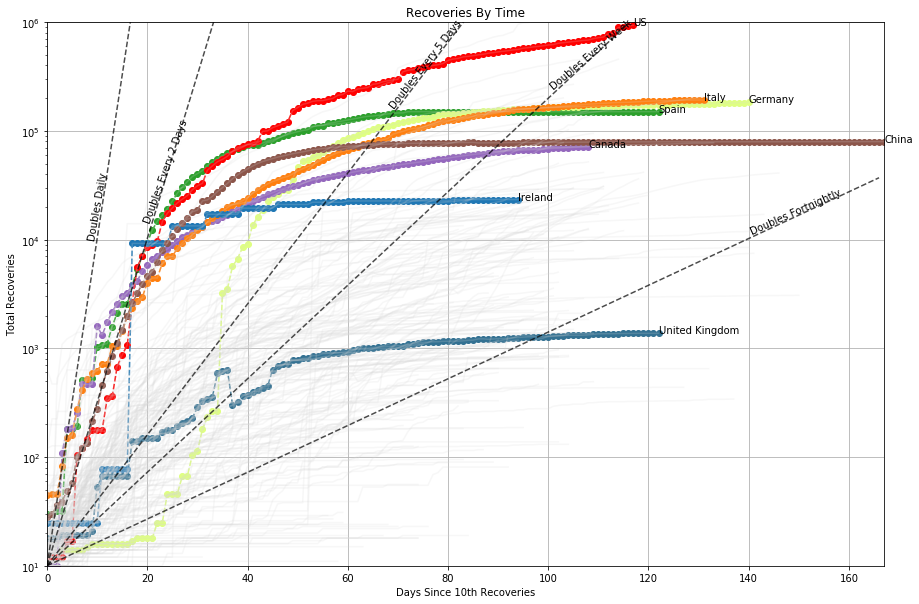

In [68]:
specialPlot(special_recovered_df, recovered_10_df, 'Recoveries', special_countries, rec_countries)

# <font color = red> Visualisation 3

 Plots (log) new daily cases on the y -axis vs. (log) total cases on the x-axis

Example given only highlights certain countries so I will select a few countries that I am interested in and plot them. 

Need to get a dataframe with column of countries, column of daily new cases (use previous function from earlier)and use existing cumulative column  

In [69]:
#re-clean the df
confirmed_df_countries=confirmed_df_countries.drop('True/False', axis=1)
deaths_df_countries=deaths_df_countries.drop('True/False', axis=1)
recovered_df_countries=recovered_df_countries.drop('True/False', axis=1)

In [70]:
drip_df_confirmed = confirmed_df_countries
drip_df_deaths = deaths_df_countries
drip_df_recoveries = recovered_df_countries

In [71]:
drip_df_deaths

Deaths
Country/Region Date              
Afghanistan    2020-01-22       0
               2020-01-23       0
               2020-01-24       0
               2020-01-25       0
               2020-01-26       0
...                           ...
Zimbabwe       2020-07-03       7
               2020-07-04       8
               2020-07-05       8
               2020-07-06       9
               2020-07-07       9

[31584 rows x 1 columns]

In [72]:
def vis3Df(df, var, countries):
    
    df['Daily'] = df[var].diff().fillna(0)
    #REMOVE THE FIRST ROW OF EACH COUNTRY AS THERE IS NO 'Previous Day Data' to compare it too
    #Also remove negative values
    df["True/False"] = df['Daily'].apply(lambda x: x >= 0)
    #remove false values so only rows with values >0 remain
    df = df.loc[df['True/False'], :]
    df=df.drop('True/False', axis=1)
    
    return df

In [73]:
#create a list of countries from the dataframes created
con_countries_drip = set(countryList(drip_df_confirmed))
deaths_countries_drip = set(countryList(drip_df_deaths))
recovered_countries_drip = set(countryList(drip_df_recoveries))

In [75]:
#make the dataframes
drip_df_confirmed = vis3Df(drip_df_confirmed, 'Cases', con_countries_drip)
drip_df_deaths = vis3Df(drip_df_deaths, 'Deaths', deaths_countries_drip)
drip_df_recoveries = vis3Df(drip_df_recoveries, 'Recoveries', recovered_countries_drip)

In [86]:
def dripPlot(df, var, countries):

    fig, ax = plt.subplots()

    

    for country in countries:
        
        df.loc[country, : ].plot(x = var, y = 'Daily', ax = ax, figsize=(15,10), color='lightgrey', alpha = 0.2)
        if(country=="Ireland"):
            df.loc[country, : ].plot(x = var, y = 'Daily', ax = ax, figsize=(15,10), color='tab:blue',marker="o",ls='dashed')
            x=df.loc["Ireland", : ][var][-1]
            y=df.loc["Ireland", : ]['Daily'].values[-1]
                # add country annotation based on last coordinate pair in list
            ax.annotate('Ireland', (x,y))
            
        if(country=="Germany"):
            df.loc[country, : ].plot(x = var, y = 'Daily', ax = ax, figsize=(15,10), color='#dfff82',marker="o",ls='dashed')

            x=df.loc["Germany", : ][var][-1]
            y=df.loc["Germany", : ]['Daily'].values[-1] 
                # add country annotation based on last coordinate pair in list
            ax.annotate('Germany',  (x,y))

        if(country=="Chile"):
            df.loc[country, : ].plot(x = var, y = 'Daily', ax = ax, figsize=(15,10), color='tab:brown',marker="o",ls='dashed')
            x=df.loc["Chile", : ][var][-1]
            y=df.loc["Chile", : ]['Daily'].values[-1] 
                # add country annotation based on last coordinate pair in list
            ax.annotate('Chile',  (x,y))
            
        if(country=="US"):
            df.loc[country, : ].plot(x = var, y = 'Daily', ax = ax, figsize=(15,10), color='r',marker="o",ls='dashed')
            x=df.loc["US", : ][var][-1]
            y=df.loc["US", : ]['Daily'].values[-1] 
                # add country annotation based on last coordinate pair in list
            ax.annotate('US',  (x,y))
            
        if(country=="United Kingdom"):
            df.loc[country, : ].plot(x = var, y = 'Daily', ax = ax, figsize=(15,10), color='#337192',marker="o",ls='dashed')
            x=df.loc["United Kingdom", : ][var][-1]
            y=df.loc["United Kingdom", : ]['Daily'].values[-1] 
                # add country annotation based on last coordinate pair in list
            ax.annotate('United Kingdom',  (x,y))
            
        if(country=="Canada"):
            df.loc[country, : ].plot(x = var, y = 'Daily', ax = ax, figsize=(15,10), color='tab:purple',marker="o",ls='dashed')
            x=df.loc["Canada", : ][var][-1]
            y=df.loc["Canada", : ]['Daily'].values[-1] 
                # add country annotation based on last coordinate pair in list
            ax.annotate('Canada',  (x,y))
        


    plt. annotate('', xy=(1000, 1000), xytext=(10,10), arrowprops=dict(facecolor='k', shrink=0), 
              horizontalalignment='right', verticalalignment='bottom') 
    plt.annotate("Exponential Growth", xy=(10, 10), xytext=(50,100), rotation=45)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend_.remove()
    plt.title("New "+ var+ " v Total " +var)
    plt.xlabel("Total "+ var + " (log) by Time")
    plt.ylabel("New Daily "+ var + " (log) by Time")
    plt.grid(True)
    plt.show()

### Cases

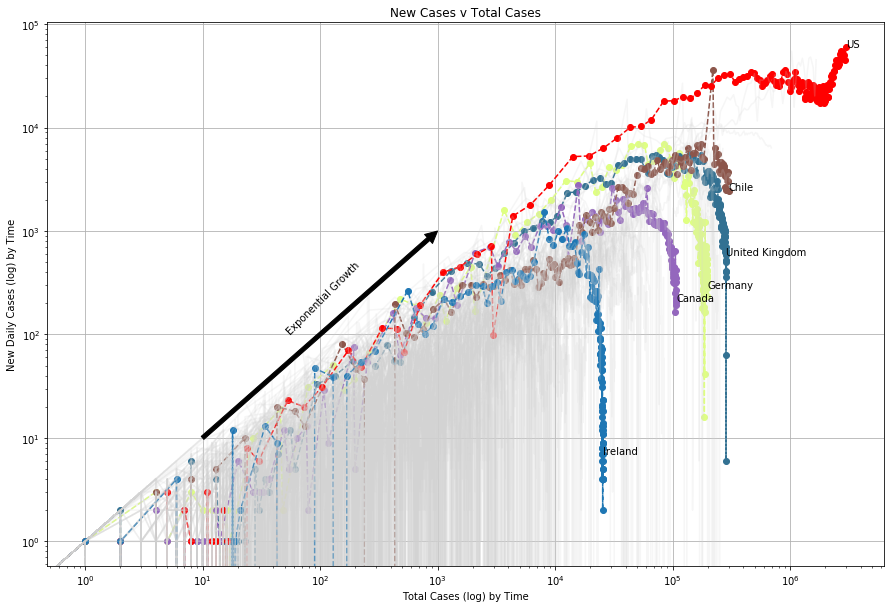

In [87]:
dripPlot(drip_df_confirmed, 'Cases', con_countries)

### Deaths

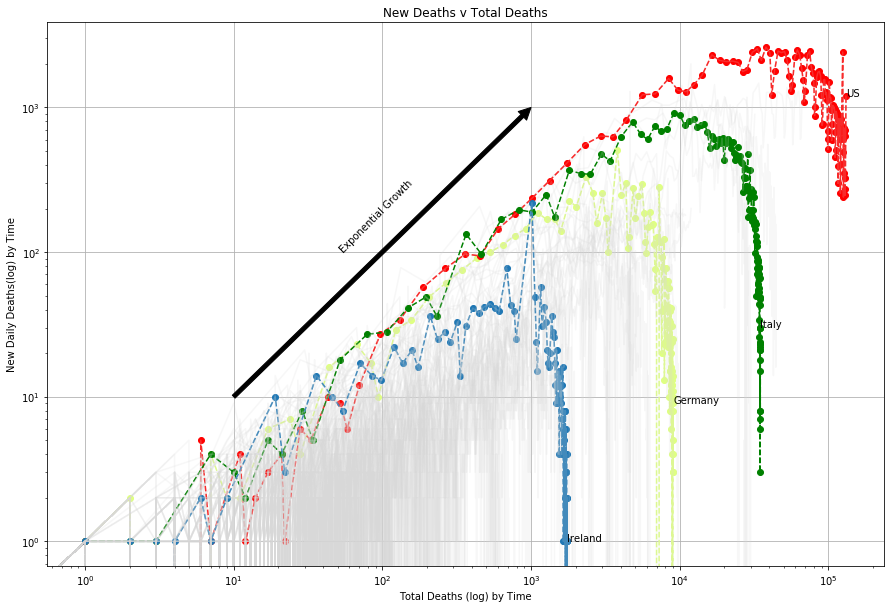

In [88]:
fig, ax = plt.subplots()


for country in deaths_countries_drip:
    if(country=="Ireland"):
        drip_df_deaths.loc[country, : ].plot(x = 'Deaths',y='Daily', ax = ax, figsize=(15,10), color='tab:blue',marker="o",ls='dashed')
        x=drip_df_deaths.loc["Ireland", : ]['Deaths'][-1]
        y=drip_df_deaths.loc["Ireland", : ]['Daily'].values[-1]
        # add country annotation based on last coordinate pair in list
        ax.annotate('Ireland', (x,y))
        
    if(country=="Germany"):
        drip_df_deaths.loc[country, : ].plot(x = 'Deaths', y = 'Daily', ax = ax, figsize=(15,10), color='#dfff82',marker="o",ls='dashed')

        x=drip_df_deaths.loc["Germany", : ]['Deaths'][-1]
        y=drip_df_deaths.loc["Germany", : ]['Daily'].values[-1] 
        # add country annotation based on last coordinate pair in list
        ax.annotate('Germany',  (x,y))

        
    if(country=="US"):
        drip_df_deaths.loc[country, : ].plot(x = 'Deaths', y = 'Daily', ax = ax, figsize=(15,10), color='r',marker="o",ls='dashed')
        x=drip_df_deaths.loc["US", : ]['Deaths'][-1]
        y=drip_df_deaths.loc["US", : ]['Daily'].values[-1] 
        # add country annotation based on last coordinate pair in list
        ax.annotate('US',  (x,y))
        
    if(country=="Italy"):
        drip_df_deaths.loc[country, : ].plot(x = 'Deaths', y = 'Daily', ax = ax, figsize=(15,10), color='g',marker="o",ls='dashed')
        x=drip_df_deaths.loc["Italy", : ]['Deaths'][-1]
        y=drip_df_deaths.loc["Italy", : ]['Daily'].values[-1] 
        # add country annotation based on last coordinate pair in list
        ax.annotate('Italy',  (x,y))
    else:
        drip_df_deaths.loc[country, : ].plot(x = 'Deaths', y = 'Daily', ax = ax, figsize=(15,10), color='#D8D8D8', alpha = 0.2)

plt. annotate('', xy=(1000, 1000), xytext=(10,10), arrowprops=dict(facecolor='k', shrink=0), 
              horizontalalignment='right', verticalalignment='bottom') 
plt.annotate("Exponential Growth", xy=(10, 10), xytext=(50,100), rotation=45)
    

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend_.remove()
plt.title("New Deaths v Total Deaths" )
plt.xlabel("Total Deaths (log) by Time")
plt.ylabel("New Daily Deaths(log) by Time")
plt.grid(True)
plt.show()

### Recoveries

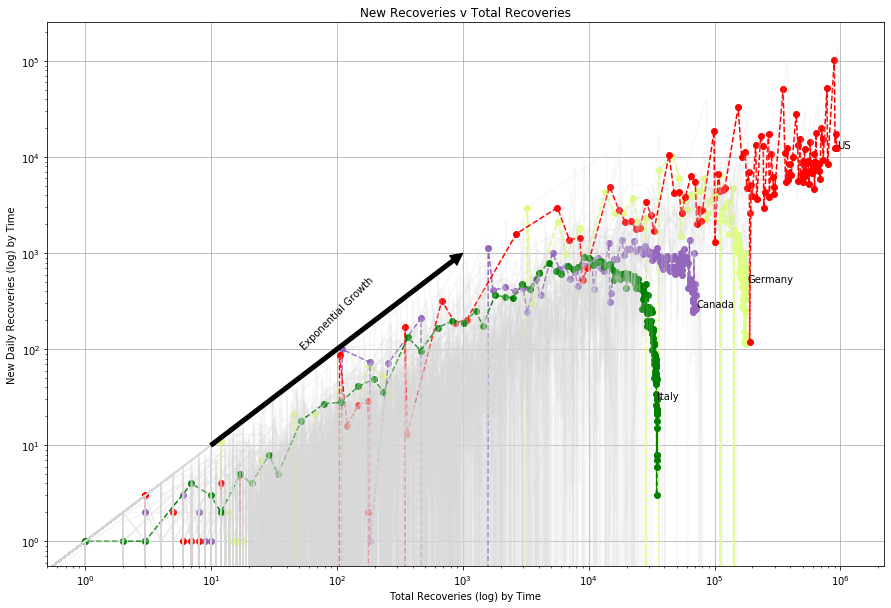

In [89]:
fig, ax = plt.subplots()


for country in recovered_countries_drip:
    #plot most of the countries in grey
    drip_df_recoveries.loc[country, : ].plot(x = 'Recoveries', y = 'Daily', ax = ax, figsize=(15,10), color='#D8D8D8', alpha = 0.2)
        
    if(country=="Germany"):
        drip_df_recoveries.loc[country, : ].plot(x = 'Recoveries', y = 'Daily', ax = ax, figsize=(15,10), color='#dfff82',marker="o",ls='dashed')

        x=drip_df_recoveries.loc["Germany", : ]['Recoveries'][-1]
        y=drip_df_recoveries.loc["Germany", : ]['Daily'].values[-1] 
        # add country annotation based on last coordinate pair in list
        ax.annotate('Germany',  (x,y))

        
    if(country=="US"):
        drip_df_recoveries.loc[country, : ].plot(x = 'Recoveries', y = 'Daily', ax = ax, figsize=(15,10), color='r',marker="o",ls='dashed')
        x=drip_df_recoveries.loc["US", : ]['Recoveries'][-1]
        y=drip_df_recoveries.loc["US", : ]['Daily'].values[-1] 
        # add country annotation based on last coordinate pair in list
        ax.annotate('US',  (x,y))
        
    if(country=="Canada"):
        drip_df_recoveries.loc[country, : ].plot(x = 'Recoveries', y = 'Daily', ax = ax, figsize=(15,10), color='tab:purple',marker="o",ls='dashed')
        x=drip_df_recoveries.loc["Canada", : ]['Recoveries'][-1]
        y=drip_df_recoveries.loc["Canada", : ]['Daily'].values[-1] 
        # add country annotation based on last coordinate pair in list
        ax.annotate('Canada',  (x,y))
        
    if(country=="Italy"):
        drip_df_deaths.loc[country, : ].plot(x = 'Deaths', y = 'Daily', ax = ax, figsize=(15,10), color='g',marker="o",ls='dashed')
        x=drip_df_deaths.loc["Italy", : ]['Deaths'][-1]
        y=drip_df_deaths.loc["Italy", : ]['Daily'].values[-1] 
        # add country annotation based on last coordinate pair in list
        ax.annotate('Italy',  (x,y))
        
#     if(country=="United Kingdom"):
#         drip_df_recoveries.loc[country, : ].plot(x = 'Recoveries', y = 'Daily', ax = ax, figsize=(15,10), color='tab:blue',marker="o",ls='dashed')
#         x=drip_df_recoveries.loc["United Kingdom", : ]['Recoveries'][-1]
#         y=drip_df_recoveries.loc["United Kingdom", : ]['Daily'].values[-1] 
#         # add country annotation based on last coordinate pair in list
#         ax.annotate('United Kingdom',  (x,y))
        

plt. annotate('', xy=(1000, 1000), xytext=(10,10), arrowprops=dict(facecolor='k', shrink=0), 
              horizontalalignment='right', verticalalignment='bottom') 
plt.annotate("Exponential Growth", xy=(10, 10), xytext=(50,100), rotation=45)
    

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend_.remove()
plt.title("New Recoveries v Total Recoveries" )
plt.xlabel("Total Recoveries (log) by Time")
plt.ylabel("New Daily Recoveries (log) by Time")
plt.grid(True)
plt.show()

### End

Thanks for all your help over the last 6 weeks and accomodating us all! Have a great Summer.